## Append

Method .append() dapat digunakan pada dataframe/series yang ditujukan untuk menambah row-nya saja. Jika di SQL memiliki 2 tabel atau lebih maka dapat menggabungkannya secara vertikal dengan Union. Jadi SQL Union ekuivalen dengan method .append() di Pandas.

In [ ]:
import pandas as pd
# Buat series of int (s1) dan series of string (s2)
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series(["a","b","c","d","e","f"])
# Terapkan method append
s2_append_s1 = s2.append(s1)
print("Series - append:\n", s2_append_s1)
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
		   'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
		   'a':[3,4]})
# Terapkan method append
df2_append_df1 = df2.append(df1)
print("Dataframe - append:\n", df2_append_df1)

## Concat

Method .concat() dapat digunakan pada dataframe yang ditujukan untuk penggabungan baik dalam row-wise (dalam arah) atau column-wise.

In [ ]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
					'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
					'a':[3,4]})
# Terapkan method concat row-wise
row_wise_concat = pd.concat([df2, df1])
print("Row-wise - concat:\n", row_wise_concat)
# Terapkan method concat column-wise
col_wise_concat = pd.concat([df2, df1], axis=1)
print("Column-wise - concat:\n", col_wise_concat)
# Penambahan identifier --> membentuk hasil penggabungan multiindex
multiindex_concat = pd.concat([df2, df1], axis=0, keys=['df2', 'df1'])
print("Multiindex - concat:\n", multiindex_concat)

## Merge - Part 1
Method .merge() untuk menggabungkan Series/Dataframe yang bentuknya mirip dengan syntax join di SQL, specify left and right tables, join key, dan how to join (left, right, inner, full outer).

In [ ]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Merge yang ekivalen dengan SQL left join
merge_df_left = pd.merge(left= df2, right= df1, how='left', left_on= 'key', right_on='key')
print('Merge - Left:\n', merge_df_left)
# Merge yang ekivalen dengan SQL right join
merge_df_right = pd.merge(left = df2, right= df1, how='right', left_on= 'key', right_on='key')
print('Merge - Right:\n', merge_df_right)
# Merge yang ekivalen dengan SQL inner join
merge_df_inner = pd.merge(left=df2, right=df1, how='inner', left_on='key', right_on='key')
print('Merge - Inner:\n', merge_df_inner)
# Merge yang ekivalen dengan SQL outer join
merge_df_outer = pd.merge(left=df2, right=df1, how='outer', left_on='key', right_on='key')
print('Merge - Outer:\n', merge_df_outer)

## Merge - Part 2
Penggunaan method .merge yang telah dipelajari pada part 1 adalah untuk dataframe dengan index tunggal.

Bagaimana jika salah satu dataframe atau keseluruhan dataframe yang akan digabungkan tersebut memiliki multi index?

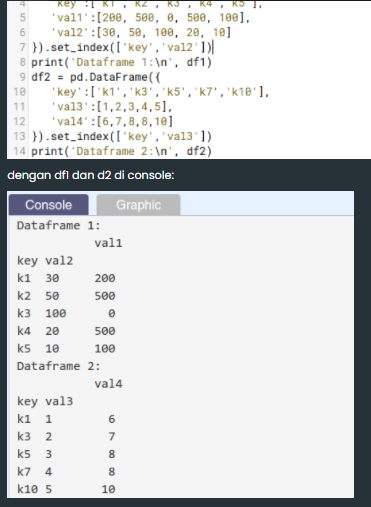

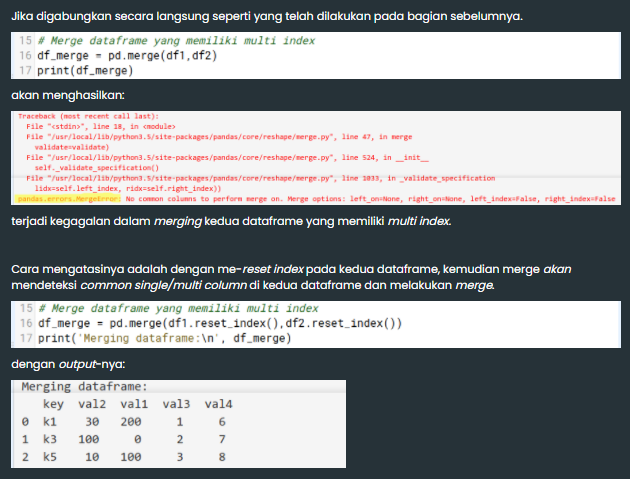

In [ ]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
}).set_index(['key','val2'])
print('Dataframe 1:\n', df1)
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
}).set_index(['key','val3'])
print('Dataframe 2:\n', df2)
# Merge dataframe yang memiliki multi index
df_merge = pd.merge(df1.reset_index(),df2.reset_index())
print('Merging dataframe:\n', df_merge)

## Join
Method .join() digunakan pada dataframe untuk menggabungkan kedua data dengan set index pada kedua tabel tersebut sebagai join key, tanpa index, hal ini tidak akan berhasil.

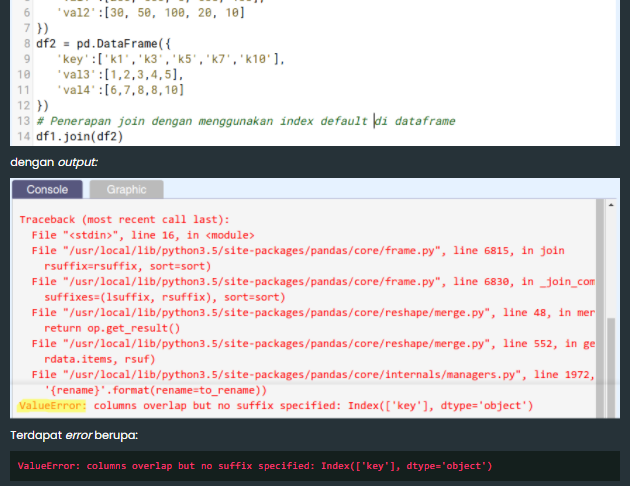

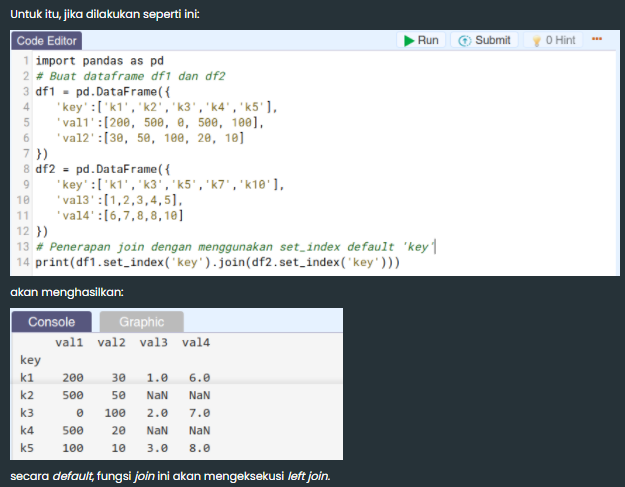

In [ ]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Penerapan join dengan menggunakan set_index dan keyword how
join_df = df1.set_index('key').join(df2.set_index('key'), how = 'outer')
print(join_df)

Kotak masuk email-ku tak hentinya menerima sejumlah link baru dari Andra untuk bab-bab yang akan kupelajari di modul Pandas part 2 ini. Banyak sekali referensi dari Andra!

“Pivot, Melt, Stack, dan Unstack, apa ini?” gumamku sendiri membaca subject email Andra.

Aku pun bergegas mengaksesnya:

Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

 

Melakukan format ulang pada dataset itu sangatlah penting, biasanya hal ini dilakukan untuk mengetahui keseluruhan data secara cepat dengan chart atau visualisasi. Untuk orang yang sudah mahir menggunakan spreadsheet pastilah tau banyak tentang fitur pivot ini.

Di Pandas, ada beberapa teknik untuk melakukan pivot atau unpivot yang biasa disebut as melt di Pandas, terdapat pula konsep stack yang artinya menumpuk data dengan kolom yang lebih sedikit (stack) sama seperti konsep melt dan ada pula yang memperluas data dengan kolom yang lebih banyak (unstack) sama seperti konsep pivot.

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

## Pivot
Untuk menerapkan menerapkan method .pivot() pada dataframe dapat dilakukan pada dataframe yang memiliki index tunggal ataupun index-nya adalah multi index.

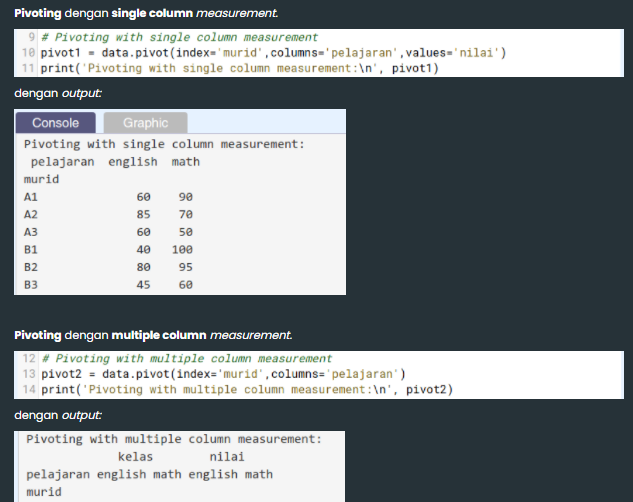

Penjelasan:

Apa yang berbeda dari kedua code di atas? Pada code pertama di specify values mana yang akan dilakukan pivot sedangkan di kedua tidak specific mana yang akan dilakukan pivot maka Pandas secara default men-treat kolom yang ada selain yang telah di specify as index dan columns as values instead.

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

## Pivot_table
Apa yang terjadi kalau output pivot tabel memiliki duplicate index? Seperti yang diketahui, index di dataframe adalah unique identifier untuk setiap row, jadi tidak boleh ada duplikat dan setiap membuat pivot tabel, harus specify index as kolom yang mana dan columns-nya memakai kolom yang mana.

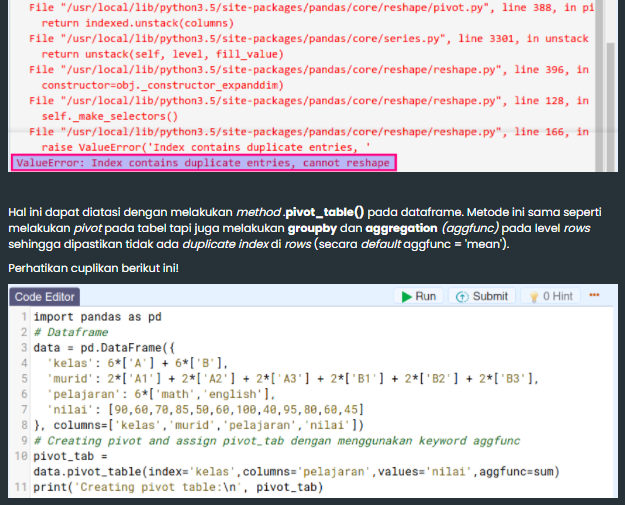

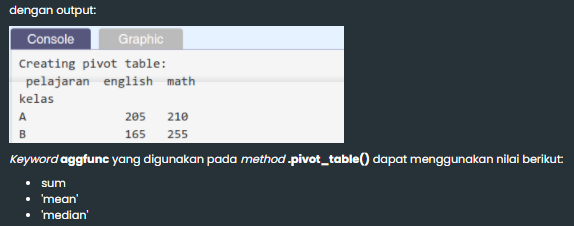

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='mean'
pivot_tab_mean = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='median'
pivot_tab_median = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)

## Melt - Part 1
Teknik melt melalui pd.melt() digunakan untuk mengembalikan kondisi data yang sudah dilakukan pivot menjadi sebelum pivot.

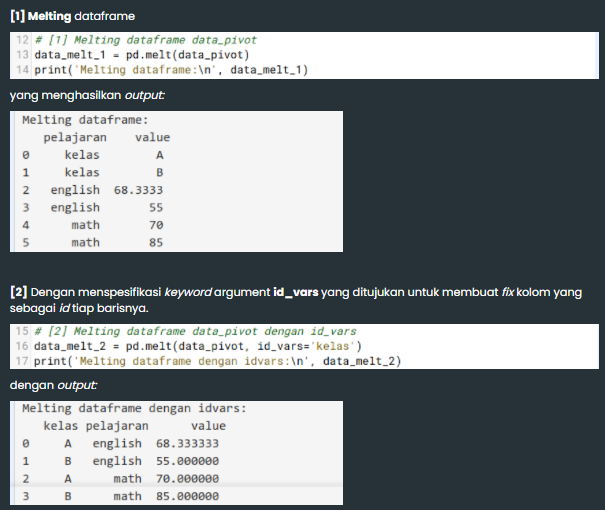

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai',aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [1] Melting dataframe data_pivot
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)
# [2] Melting dataframe data_pivot dengan id_vars
data_melt_2 = pd.melt(data_pivot, id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)

## Melt - Part 2

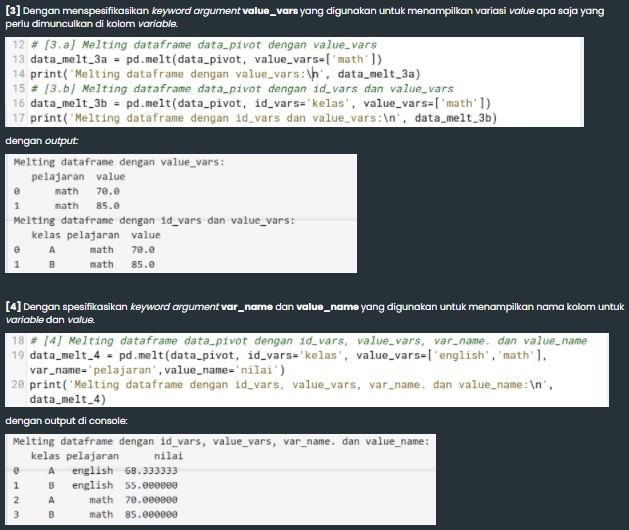

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [3.a] Melting dataframe data_pivot dengan value_vars
data_melt_3a = pd.melt(data_pivot, value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)
# [3.b] Melting dataframe data_pivot dengan id_vars dan value_vars
data_melt_3b = pd.melt(data_pivot, id_vars='kelas', value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)
# [4] Melting dataframe data_pivot dengan id_vars, value_vars, var_name. dan value_name
data_melt_4 = pd.melt(data_pivot, id_vars='kelas', value_vars=['english','math'], var_name='pelajaran', value_name='nilai')
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

## Stack & Unstack - Part 1

Konsep stacking dan unstacking sama dengan melt dan pivot secara berurutan, hanya saja tidak memasukkan index sebagai parameter di stack/unstack tapi harus set index terlebih dahulu, baru bisa melakukan stacking/unstacking dengan level yang bisa ditentukan sendiri.

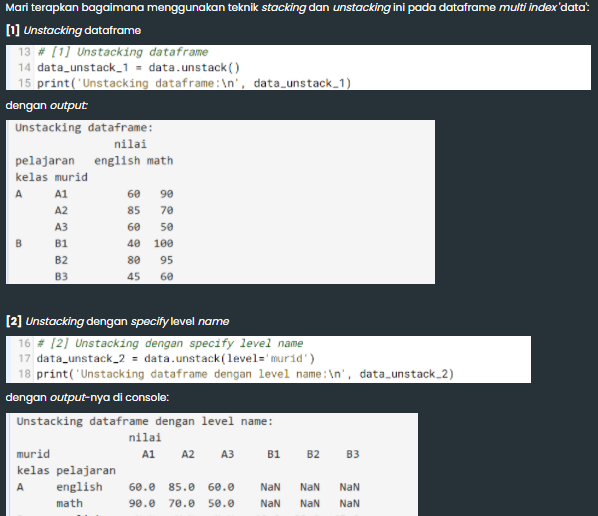

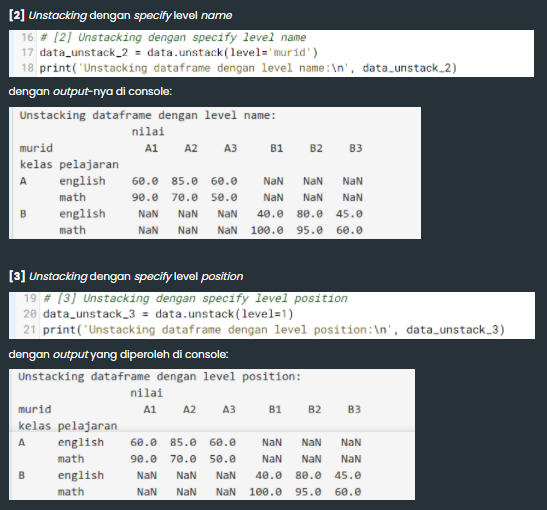

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
print('Dataframe:\n', data)
# Set index data untuk kolom kelas, murid, dan pelajaran
data = data.set_index(['kelas','murid','pelajaran'])
print('Dataframe multi index:\n', data)
# [1] Unstacking dataframe
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)
# [2] Unstacking dengan specify level name
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)
# [3] Unstacking dengan specify level position
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)

## Stack & Unstack - Part 2

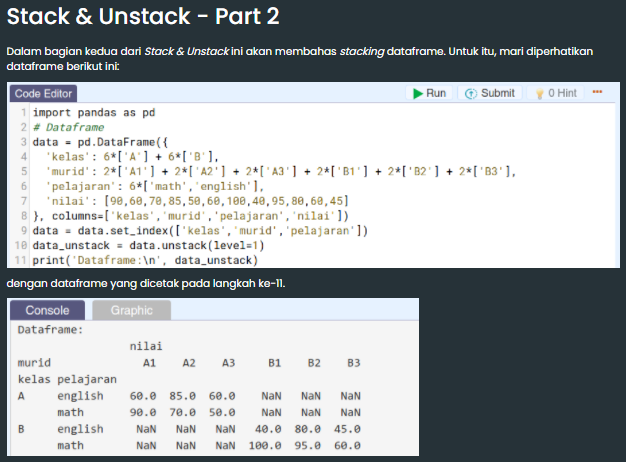

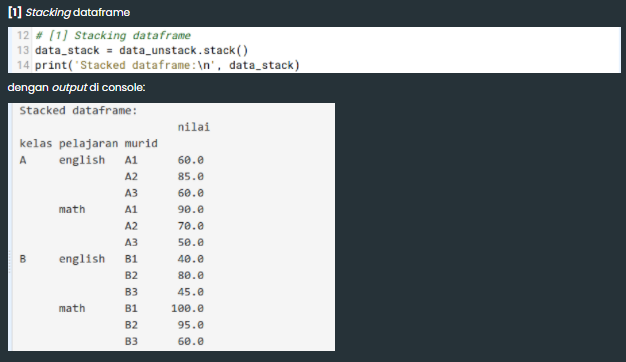

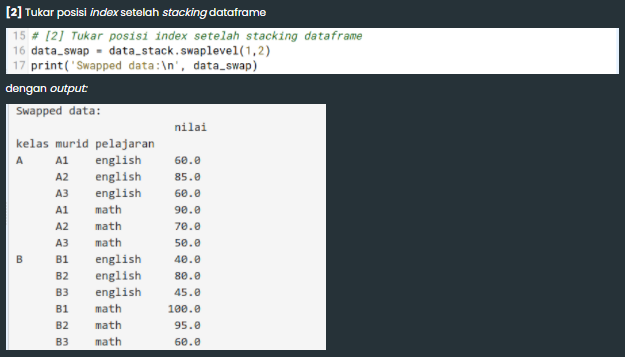

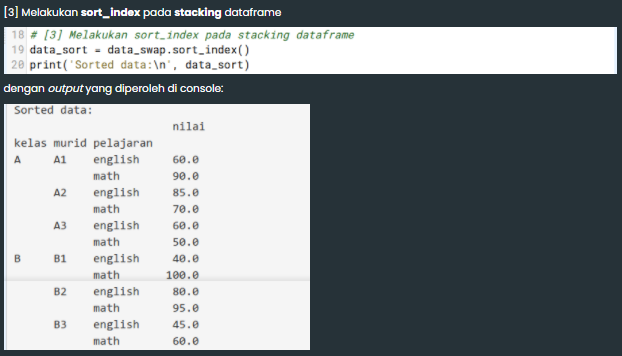

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
data = data.set_index(['kelas','murid','pelajaran'])
data_unstack = data.unstack(level=1)
print('Dataframe:\n', data_unstack)
# [1] Stacking dataframe
data_stack = data_unstack.stack()
print('Stacked dataframe:\n', data_stack)
# [2] Tukar posisi index setelah stacking dataframe
data_swap = data_stack.swaplevel(1,2)
print('Swapped data:\n', data_swap)
# [3] Melakukan sort_index pada stacking dataframe
data_sort = data_swap.sort_index()
print('Sorted data:\n', data_sort)

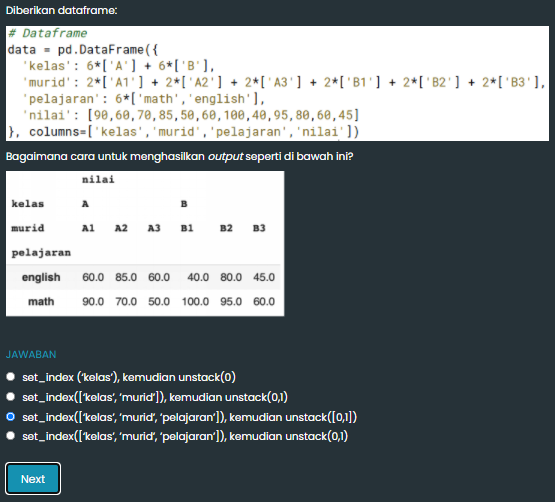

## Aggregation & GroupBy

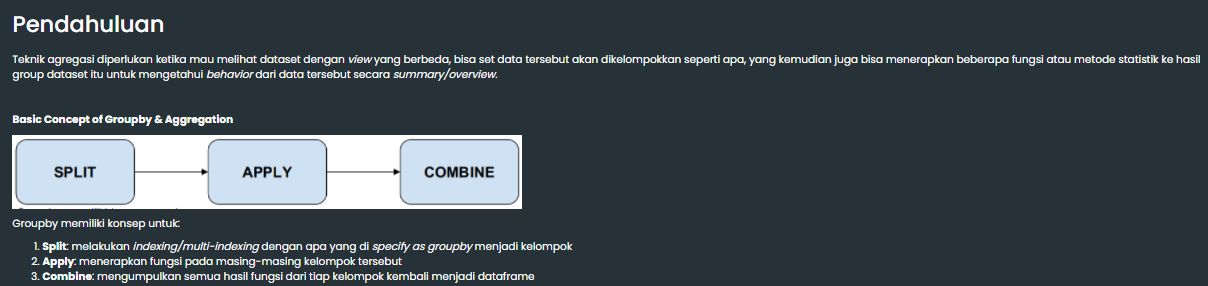

In [ ]:
import pandas as pd
# Load data global_air_quality.csv
global_air_quality = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Lima data teratas:\n', global_air_quality.head())
# Melakukan pengecekan terhadap data
print('Info global_air_quality:\n', global_air_quality.info())
# Melakukan count tanpa groupby
print('Count tanpa groupby:\n', global_air_quality.count())
# Melakukan count dengan groupby 
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())

## Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 1

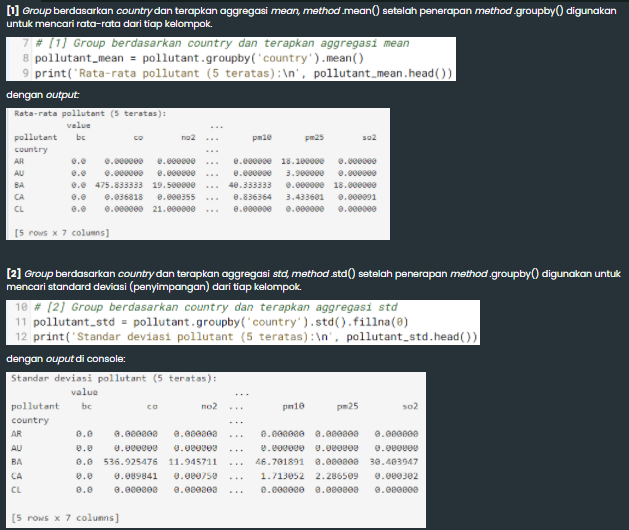

In [ ]:
import pandas as pd
# Load data global_air_quality.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [1] Group berdasarkan country dan terapkan aggregasi mean
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())
# [2] Group berdasarkan country dan terapkan aggregasi std
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())

## Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 2

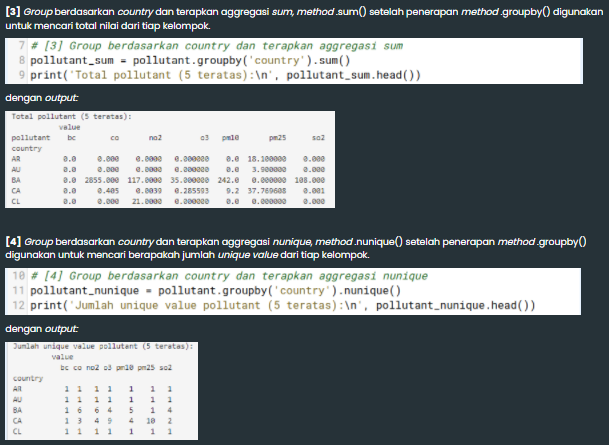

In [ ]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [3] Group berdasarkan country dan terapkan aggregasi sum
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())
# [4] Group berdasarkan country dan terapkan aggregasi nunique
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())

## Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 3

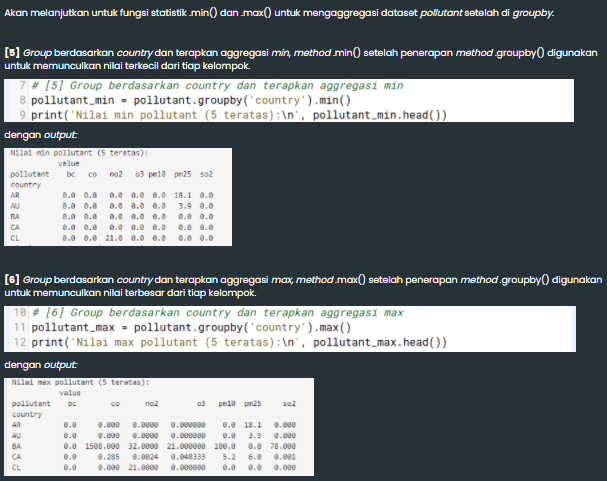

In [ ]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi first
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())
# Group berdasarkan country dan terapkan aggregasi last
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

## Groupby dengan Multiple Aggregations

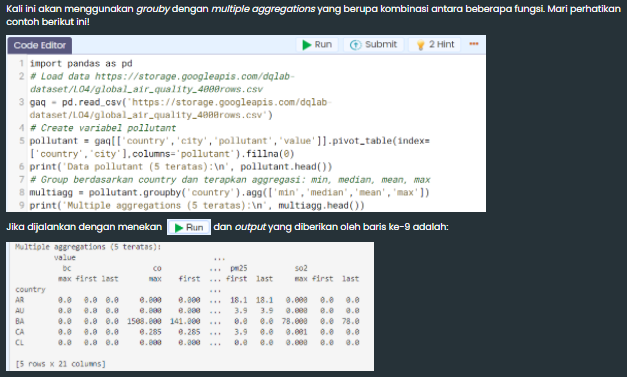

Groupby dengan Custom Aggregations

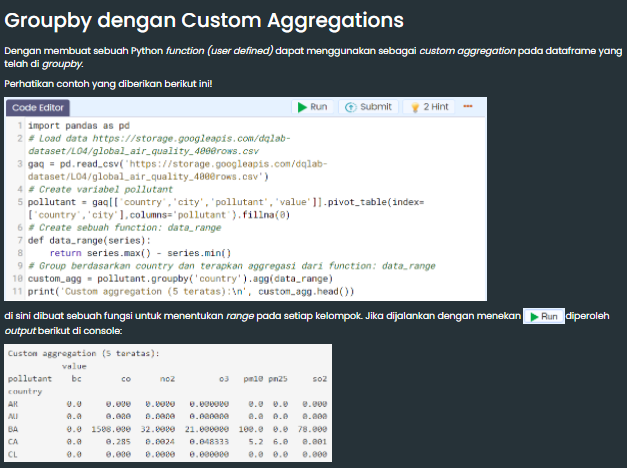

In [ ]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
# Create sebuah function: iqr
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3-Q1
# Group berdasarkan country dan terapkan aggregasi dari function: iqr
custom_agg = pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

## Groupby dengan Custom Aggregations by dict

Penggunaan custom aggregation lainnya pada dataframe yang telah di groupby dapat dilakukan dengan mempasskan sebuah dict yang berisi 'key' dict sebagai nama kolomnya dan 'value' dict adalah fungsi untuk aggregasi, baik user defined function atau yang telah tersedia.

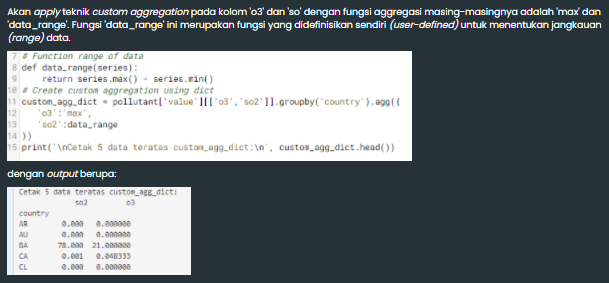

In [ ]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Function IQR
def iqr(series):
	return series.quantile(0.75) - series.quantile(0.25)
# Create custom aggregation using dict
custom_agg_dict = pollutant['value'][['pm10','pm25','so2']].groupby('country').agg({
   'pm10':'median',
   'pm25':iqr,
   'so2':iqr
})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())

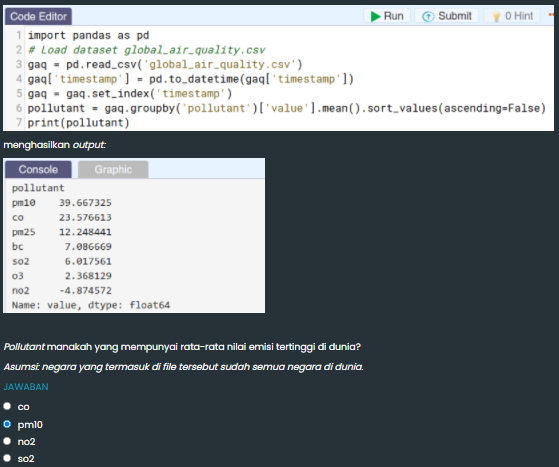

## Time Series in Pandas

### Load Dataset as Time Series
Terkadang Pandas salah mengenali object datetime menjadi object string dan pandas menjadi tidak bisa memanfaatkan full benefit dari time index.

Basic format datetime menurut ISO 8601: YYYY-mm-dd HH:MM:SS.

Terdapat beberapa cara untuk mengubah kolom waktu menjadi format yang benar as datetime object di Pandas. 

[1] read_csv, terdapat keyword argument 'parse_dates', yang jika di set True dan set index untuk kolom waktu tersebut maka kolom datetime tersebut akan transform as datetime Pandas dan menjadi index

In [ ]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())
# Cetak info dari dataframe gaq
print('info')
print(gaq.info())

### Convert to Datetime
Jika dataset yang telah terlebih dahulu atau telah terlanjur di load dengan pd.read_csv dan Pandas salah mengenali object datetime menjadi object string, maka dapat mengubah kolom tertentu dari dataset tersebut menjadi format datetime.

 

[2] pd.to_datetime digunakan untuk men-transform salah satu kolom di dataframe menjadi datetime Pandas dan kemudian set menjadi index. 

In [ ]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())
# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())

## Resampling untuk Time Series Data
Pandas time series juga memiliki fungsi resampling yang dapat berguna untuk:

[1] Downsampling
Mengurangi baris datetime menjadi frekuensi yang lebih lambat, bisa dibilang juga mengurangi rows dataset menjadi lebih sedikit
Contoh: mengubah kolom datetime yang awalnya daily menjadi monthly

[2] Upsampling
Kebalikan dari downsampling, menambah baris datetime menjadi frekuensi yang lebih cepat, menambah rows dataset dengan membuat kolom datetime menjadi lebih detail
Contoh: mengubah kolom datetime yang awalnya daily menjadi hourly

Dari resampling ini, kemudian dapat menerapkan metode statistik untuk transform value data yang ada (ex: mean, sum, count, etc).

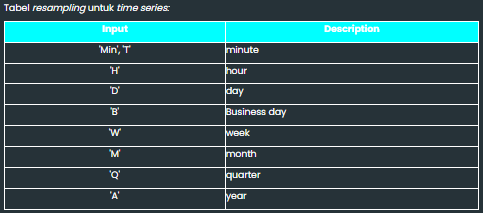

## Downsampling Data

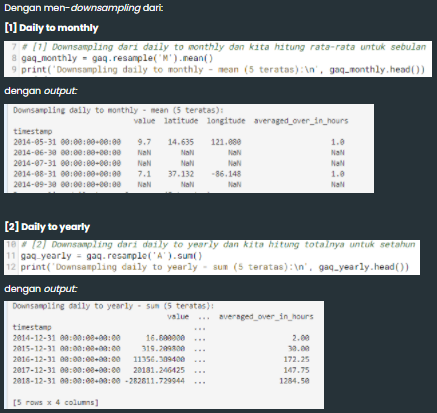

In [ ]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-downsampling (5 teratas):\n', gaq.head())
# [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_weekly = gaq.resample('W').max()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())
# [2] Downsampling dari daily to quaterly dan kita hitung minimumnya untuk tiap quarter
gaq_quaterly = gaq.resample('Q').min()
print('Downsampling daily to quaterly - min (5 teratas):\n', gaq_quaterly.head())

## Upsampling Data

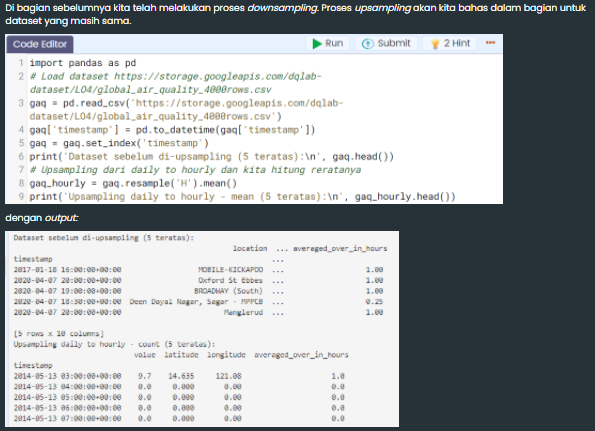

In [ ]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-upsampling (5 teratas):\n', gaq.head())
# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())

## Resampling by Frequency

Pada bagian ini akan mempelajari bagaimanakah caranya me-resampling data (baik upsampling atau downsampling) berdasarkan frekuensi, misalnya sekali 2 minggu, tiap 12 jam, dsb.

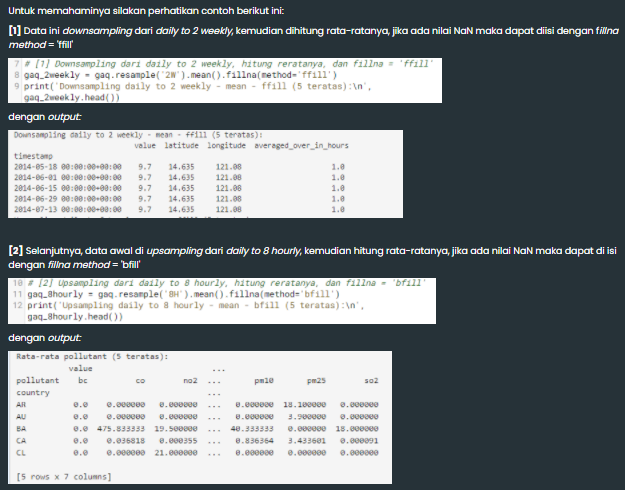

In [ ]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-resampling (5 teratas):\n', gaq.head())
# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())

## Visualisasi

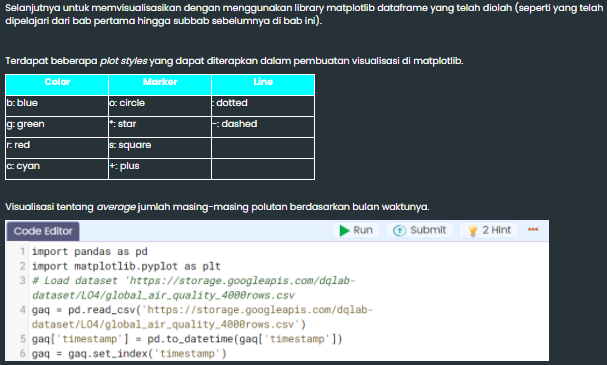

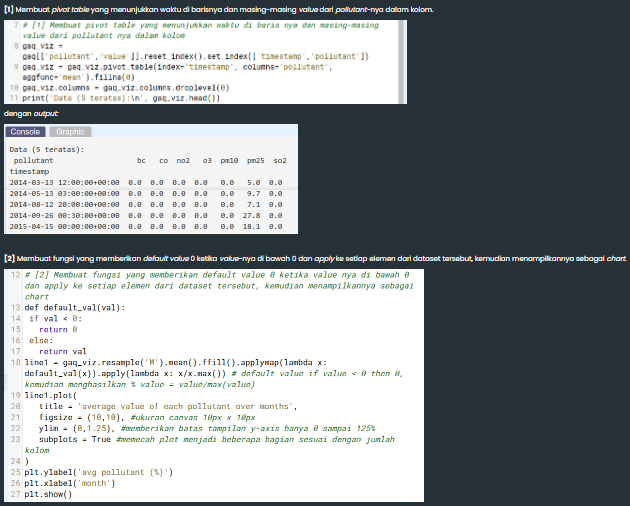

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant', 'value']].reset_index().set_index(['timestamp','pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10,10), #ukuran canvas 10px x 10px
   ylim = (0,1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

In [1]:
import pandas as pd
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq.head()

location       city country  ...   latitude  longitude averaged_over_in_hours
0                  MOBILE-KICKAPOO    LINCOLN      US  ...  35.488400 -97.090280                   1.00
1                  Oxford St Ebbes     Oxford      GB  ...  51.744804  -1.260278                   1.00
2                 BROADWAY (South)  St. Louis      US  ...  38.542500 -90.263610                   1.00
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN  ...  23.864016  78.802895                   0.25
4                        Manglerud       Oslo      NO  ...  59.898690  10.814950                   1.00

[5 rows x 11 columns]

In [ ]:
# Andra ingin mengetahui bagaimana trend dari nilai rata-rata pollutant SO2 (kolom pollutant) yang dihitung dari perhitungan value SO2 (kolom value) dalam tahunan, apa yang akan aku lakukan untuk membantu Andra?

gaq.loc[gaq['pollutant'] == 'so2', 'value'].resample('A').mean().plot()

## Performa Penjualan di Setiap Cabang - Part 1
Diberikan 4 csv files yang isinya retail data untuk tiap quarter:

csv (data dari bulan January - March)       --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv
csv (data dari bulan April - June)              --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv
csv (data dari bulan July - September)      --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv
csv (data dari bulan October - December)  --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv
 

Goal: Automation untuk pembuatan grafik dari measurement yang dibutuhkan.

Untuk part 1 ini yang perlu dilakukan:

[1]. Load masing-masing data *.csv dengan Pandas

[2]. Pengecekan dan Transformasi Data 

Cek data sekilas (melihat bentuk data biasanya 5 data teratas)
Cek list kolom untuk semua dataframe apakah seluruh kolom dari keempat dataframe yang terpisah itu sama
Jika sama digabungkan.
Cek informasi dataframe yang telah digabungkan
Statistik deskriptif dari dataframe yang telah digabungkan.
Untuk representasi string gunakan kutip satu, misalnya: 'contoh string'.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')
#      Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())
#      Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)
#      Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])
print('\nJumlah baris:', retail_table.shape[0])
#      Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())
#      Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

## Performa Penjualan di setiap Cabang - Part 2

Melanjutkan penyelesaian persoalan ke langkah berikutnya.

[3] Transformasi Data 

Jika ada data yang tidak seharusnya maka dapat dibuang
Jika ada kolom yang seharusnya bertipe datetime64 ubahlah
Cek kembali informasi dataframe 
Tampilkan kembali statistik deskriptif dari dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')
#      Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)
#      Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]
#      Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)
#      Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

#      Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')
#      Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
#      Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())
#      Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())

### Performa Penjualan di setiap Cabang - Part 3
Mari lanjutkan ke langkah berikutnya.

[4]. Filter province yang hanya termasuk 5 provinsi besar di Jawa (DKI Jakarta, Jawa Barat, Jawa Tengah, Jawa Timur, dan Yogyakarta)

[5]. Mengelompokkan data berdasarkan order_date dan province yang sudah di filter dan menghitung order unique count, customer unique count, product unique count, brand unique count, dan GMV (Gross Merchandise Volume = total_price untuk semua penjualan)

[6]. Melakukan unstack untuk mendapatkan order_date di bagian baris dan province di bagian column

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
#      Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
#      Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())

## Performa Penjualan di setiap Cabang - Part 4
Ayo lanjutkan ke langkah berikutnya:
[7]. Slicing data untuk masing-masing measurement (kolom), misal: kolom order

[8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan secara bulanan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())

## Performa Penjualan di setiap Cabang - Part 5

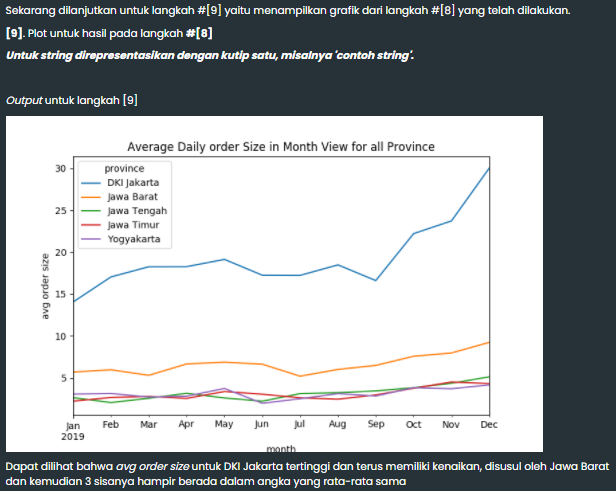

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
by_order_monthly_mean = by_order.resample('M').mean()

# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for All Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

## Performa Penjualan di setiap Cabang - Part 6

Langkah 7 s/d 9 yang telah dilakukan baru untuk satu measurement yaitu order. Berarti ada empat kali lagi kode seperti ini harus dibuat. Karena struktur code masih sama, dapat menggunakan perulangan sesuai dengan jumlah measurement yaitu 5, sehingga kelima measurement dapat ditampilkan grafiknya dalam satu canvas figure.

Mari memulai dengan membuat sebuah perulangan dengan dataframe unstack_city_province yang digunakan (hasil dari langkah ke 5 di part 2).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

### Evaluasi Andra untuk Project yang Telah Disubmit
Aku baru selesai mengecek ulang hasil kerjaku sebelum kuberikan pada Andra. Sejauh pemeriksaanku semua tampak baik-baik saja. Aku pun menutup laptopku dan membawanya ke ruangan Andra. Harus kuakui, aku cukup berdebar-debar! Walaupun proyek pertama berjalan lancar, tetap saja rasanya tegang membayangkan tanggapan Andra terhadap hasil kerjaku. Semoga tidak mengecewakan. 


“Ndra, maaf ganggu. Ini hasil proyek kemarin sudah selesai. Aku menganalisis rata-rata jumlah order, customer, produk, brand, dan GMV per hari dalam bulanan untuk 5 provinsi besar di Pulau Jawa sesuai rikues. Mau dicek dulu?”


“Boleh, coba tolong dibawa ke mari laptop kamu.” 


Selang beberapa menit, Andra menyahut “Saya mau tanya. Kamu pakai define function di kodemu, gunanya untuk apa?”


“Buat automate pembuatan dan penyimpanan grafik, Ndra. Jadi tinggal state saja dataframe-nya yang mana dan pengelompokannya seperti apa.” jelasku. Ujian tanya jawab telah dimulai! Andra memang tipikal mentor yang akan menguji hasil pekerjaan. Perlahan cara ini melatihku untuk mengambil keputusan dan langkah yang benar-benar matang.


“Oke. Kenapa kamu enggak pakai command saja yang diulang sampai 5 kali kepada 5 measurement yang berbeda?” 


“Soalnya pakai looping akan lebih mudah, Ndra. Aku tinggal mengganti order pada Part 3 menjadi sebuah variable bernama measurement, lalu lakukan for loop untuk diulang ke semua measurement yang ada,” jawabku mantap.


Andra tersenyum. “Oke, sepertinya kamu benar-benar tahu apa yang kamu lakukan. Akan saya bawa ke rapat nanti untuk dibahas dengan kepala cabang, saya akan undang kamu ke rapat juga.”


Aku mengangguk antusias.

## Hasil Belajarku :)
Walau harus bekerja keras, aku cukup puas dengan hasil kerjaku hari ini. Aku memandangi kode final yang sudah selesai kukerjakan. Diam-diam ada perasaan bangga menyelip di benakku! YES!

Akhirnya, aku telah menyelesaikan modul Data Manipulation with Pandas - Part 2. Materi-materi yang telah kupelajari dan praktikkan dalam modul ini aku telah mendapatkan pengetahuan (knowledge) dan praktek (skill) untuk:

Dapat menerapkan teknik penggabungan data antar Series dan Dataframe dengan menggunakan concat, merge dan join.
Dapat memahami konsep dan menerapkan teknik pivot, melt, stack dan unstack pada dataframe untuk memformat ulang bentuk data.
Dapat memahami konsep dan menerapkan teknik groupby dan aggregation untuk mengurangi jumlah data.
Mengenal dan memahami konsep time series di Pandas
Latihan dalam mengerjakan project bisnis sederhana menggunakan pandas
 

Ada juga sejumlah catatan yang perlu aku ingat, yaitu

Jikalau terdapat berbagai multiple source untuk extract 1 informasi, maka pastikan struktur datanya adalah sama, list column dan data types.
Mengerti business understanding-nya sehingga jika diperlukan melakukan join maka bisa melakukan join dengan efektif dan tepat
Mengerti tujuan analisisnya sehingga bisa melakukan aggregation dan transform data (pivot, melt, etc) data dengan tepat dan efektif
Sebisa mungkin selalu set index pada kolom datetime sehingga slicing menjadi lebih mudah dan melakukan hal lain seperti downsampling ataupun upsampling
Selalu gunakan automation jika memungkinkan karena itu akan mempermudah hidupmu dan menghemat waktu
 

Pesan dari data mentor Karl Christian:

“Data Manipulation is redundant tasks if you have to specify all the parameters one by one, the key is trying to figure out the first phase, then replicate that command become a function that you can call to create a scalable output. This process can be called as Automation.”  By KARL CHRISTIAN, 2020